In [7]:
conda install geopandas 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/bmd23/miniconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    ca-certificates-2021.4.13  |       h06a4308_1         114 KB
    cairo-1.14.12              |       h8948797_3         906 KB
    cffi-1.14.0                |   py38h2e261b9_0         226 KB
    click-plugins-1.1.1        |             py_0          12 KB
    cligj-0.7.1                |   py38h06a4308_0          13 KB
    conda-4.10.1               |   py38h06a4308_1         2.9 MB
    curl-7.67.0                |       hbc83047_0         134 KB
    f

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.filters import rank, laplace
from skimage.util import img_as_float, img_as_ubyte
from skimage.color import rgb2gray
import scipy as sp

In [15]:
import geopandas as gpd
import os
import rasterio as rio
from rasterio import plot, mask
import matplotlib.pyplot as plt
import numpy as np
import rioxarray
import pandas as pd

In [27]:
geo_crop_dir = '../Images'

In [32]:

muldrow = gpd.read_file('../Images')

DriverError: '../Images' not recognized as a supported file format.

In [29]:
file_list = []
date_list = []
for file in os.listdir(geo_crop_dir):
    if file != '.ipynb_checkpoints':
        file_list.append(file)
        date = pd.to_datetime(file[14:29])
        date_list.append(date)

In [19]:
!pwd

/home/bmd23/chemE599/glacier-velocity-from-sar/project/Analysis


In [26]:
!ls ..

Analysis  Analysis.ipynb  Images  function.py  glacier-velocity-from-sar


In [30]:
date_list.sort()
file_list.sort()

NameError: name 'muldrow' is not defined

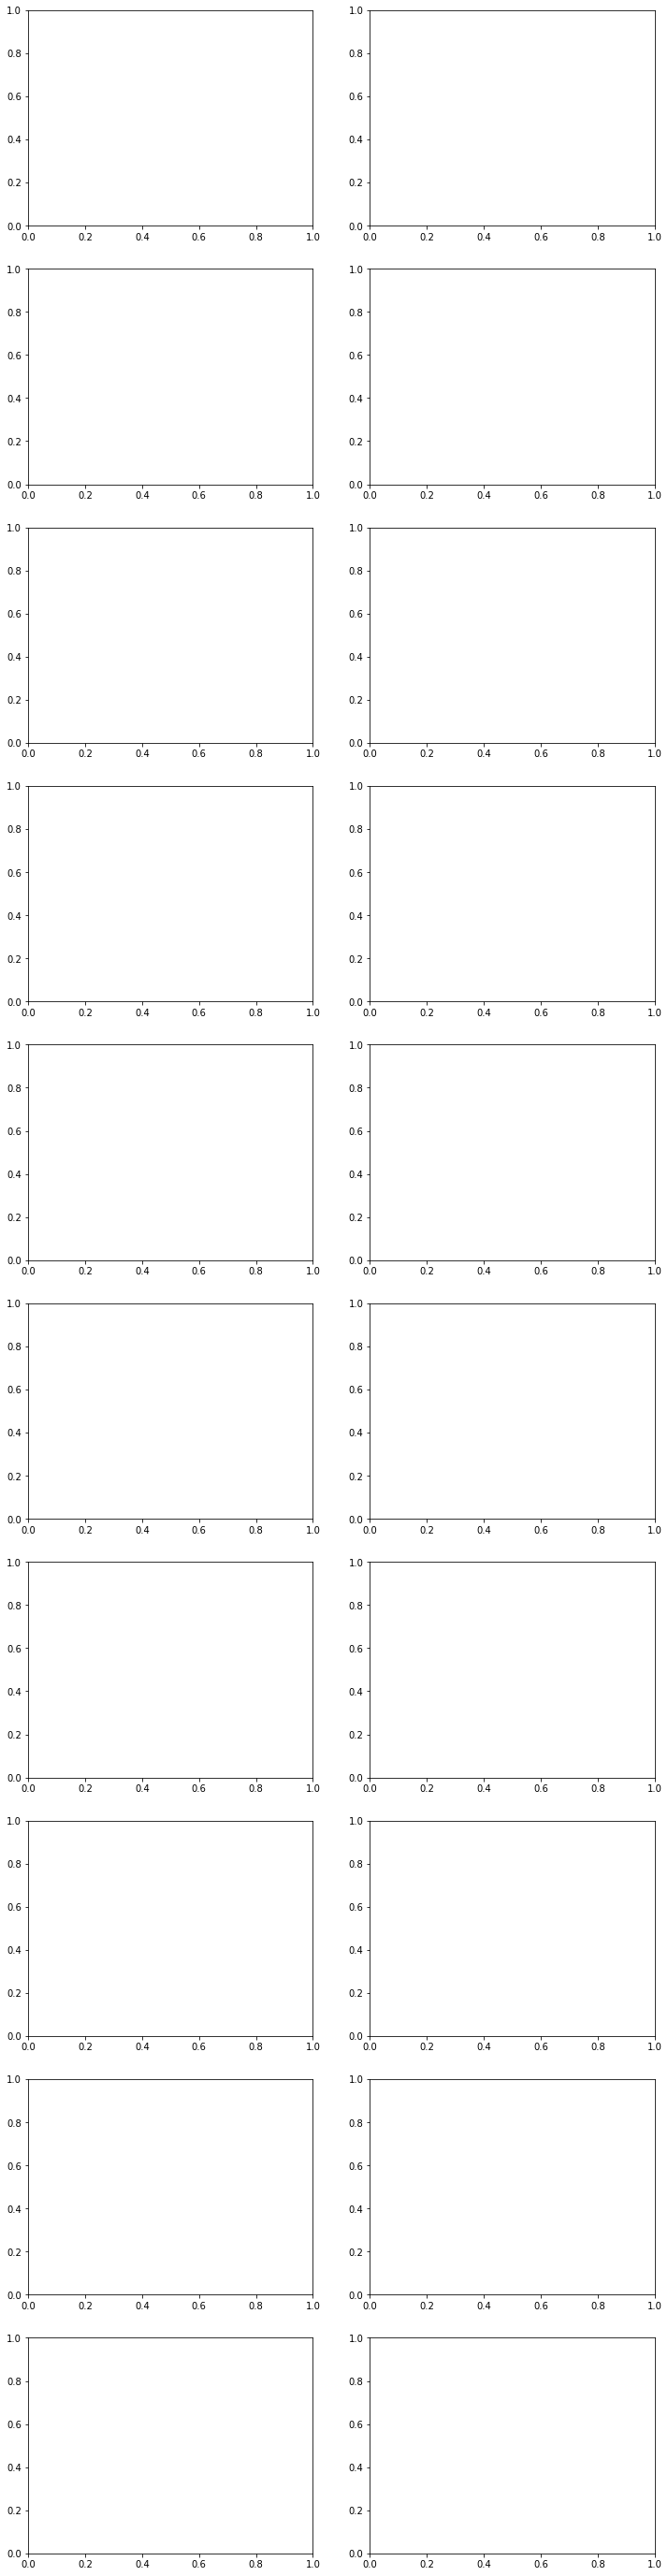

In [31]:
f,ax=plt.subplots(len(file_list),2,figsize=(12,50))
for i,file in enumerate(file_list):
    sar_image_clip = rioxarray.open_rasterio(f'{geo_crop_dir}/{file}',masked=True,from_disk=True).rio.clip(muldrow.geometry,muldrow.crs, drop=False, invert=False)
    sar_image = plt.imread(f'{geo_crop_dir}/{file}')
    color = ax[i,0].imshow(np.log(sar_image,where=(sar_image!=0)),cmap='gray',vmin=0,vmax=9)
    ax[i,0].set_title(date_list[i])
    f.colorbar(color,ax=ax[i,0])
    sar_image_clip = sar_image_clip.squeeze()
    ax[i,1].imshow(np.log(sar_image_clip,where=(sar_image_clip!=0)),cmap='gray',vmin=0,vmax=9)
    ax[i,1].set_title(date_list[i])